#### **This  notebook test for the correlation between perspective API and the open AI scores**

In [2]:
import pandas as pd

In [3]:
df_open_ai_scores = pd.read_pickle(
        './../data/scores/open_ai_scores.pkl.gz'
    )

In [4]:
df_perspective = pd.read_pickle(
        './../data/scores/perspective_api_scores.pkl.gz'
    )

In [5]:
df_open_ai_scores.columns

Index(['harassment', 'harassment_threatening', 'hate', 'hate_threatening',
       'illicit', 'illicit_violent', 'self_harm', 'self_harm_instructions',
       'self_harm_intent', 'sexual', 'sexual_minors', 'violence',
       'violence_graphic', 'linked_tweet', 'data_lang'],
      dtype='object')

In [6]:
df_perspective.columns

Index(['linked_tweet', 'data_annotations', 'user_id', 'creation_date',
       'data_follower_count', 'data_following_count', 'data_id',
       'data_imageUrls', 'data_lang', 'data_like_count', 'mentioned_users',
       'data_name', 'data_retweet_count', 'data_screen_name', 'text',
       'data_translatedContentText', 'tweet_id', 'tweet_type', 'urls',
       'linked_tweet_user_id', 'hashtags', 'INSULT', 'THREAT', 'TOXICITY',
       'SEVERE_TOXICITY', 'PROFANITY', 'IDENTITY_ATTACK'],
      dtype='object')

#### **Count of the retweets**

In [7]:
df_rt_count = pd.read_pickle(
    './../data/posts/retweet_count.pkl.gz'
)

In [8]:
df_rt_count['count'].min()

1

In [9]:
df_rt_10 = df_rt_count.loc[df_rt_count['count']>10]

In [10]:
df_rt_10.columns

Index(['linked_tweet', 'count'], dtype='object')

#### **Filter Scores**

In [11]:
df_open_10 = df_open_ai_scores.loc[
    df_open_ai_scores['linked_tweet'].isin(df_rt_10['linked_tweet'])
]

In [12]:
df_perspect_10 = df_perspective.loc[
    df_perspective['linked_tweet'].isin(df_rt_10['linked_tweet'])
]

In [13]:
len(df_open_10)

5171

In [14]:
len(df_perspect_10)

5171

#### **Correlation**

In [15]:
perspective = ['INSULT', 'THREAT', 'TOXICITY',
               'SEVERE_TOXICITY', 'PROFANITY',
               'IDENTITY_ATTACK'
              ]

open_ai = ['harassment', 
            'harassment_threatening',
            'hate', 
            'hate_threatening'
           ]

In [16]:
df_common = df_open_10.merge(df_perspect_10,
                             on='linked_tweet'
                            )

In [17]:
df_common = df_common.loc[~df_common['INSULT'].isnull()]
df_common = df_common.loc[~df_common['harassment'].isnull()]

In [18]:
# df_common.isnull().any()

In [19]:
import numpy as np
from scipy import stats

In [20]:
all_values = []
for x in perspective:
    for y in open_ai:
        spearman_corr, p_value = stats.spearmanr(df_common[x],
                                                 df_common[y]
                                                )
        print(f'{x} and {y} correlation :', spearman_corr)
        print(f'{x} and {y} correlation pvalue :', p_value)
        all_values.append([x,y, round(spearman_corr,3)])

df_corr = pd.DataFrame(data=all_values,
                       columns=['x','y','correlation']
                      )

INSULT and harassment correlation : 0.7096531504720275
INSULT and harassment correlation pvalue : 0.0
INSULT and harassment_threatening correlation : 0.546247802813309
INSULT and harassment_threatening correlation pvalue : 0.0
INSULT and hate correlation : 0.7039120714719579
INSULT and hate correlation pvalue : 0.0
INSULT and hate_threatening correlation : 0.42978276711049845
INSULT and hate_threatening correlation pvalue : 8.402444517331574e-230
THREAT and harassment correlation : 0.4185218884174504
THREAT and harassment correlation pvalue : 8.171249980085063e-217
THREAT and harassment_threatening correlation : 0.7238954102681241
THREAT and harassment_threatening correlation pvalue : 0.0
THREAT and hate correlation : 0.49659602960498045
THREAT and hate correlation pvalue : 0.0
THREAT and hate_threatening correlation : 0.6763595242265018
THREAT and hate_threatening correlation pvalue : 0.0
TOXICITY and harassment correlation : 0.7177420853751065
TOXICITY and harassment correlation pval

In [21]:
def correlation_heatmap(df, file_path=None):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Create a pivot table
    corr_matrix = df.pivot(index='x', 
                           columns='y', 
                           values='correlation'
                          )
    
    # Make the matrix symmetrical
    # corr_matrix = corr_matrix.combine_first(corr_matrix.T)
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr_matrix,
                annot=True, 
                cmap='coolwarm', 
                # linewidths=0.5,
                ax=ax
               )

    plt.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel('Open AI scores', fontsize=24)
    ax.set_ylabel('Perspective', fontsize=24)
    
    
    
    fig.tight_layout()

    if file_path != None:
        fig.savefig(f'{file_path}', 
                  facecolor='white', 
                  transparent=False
                   )
    
    plt.show()

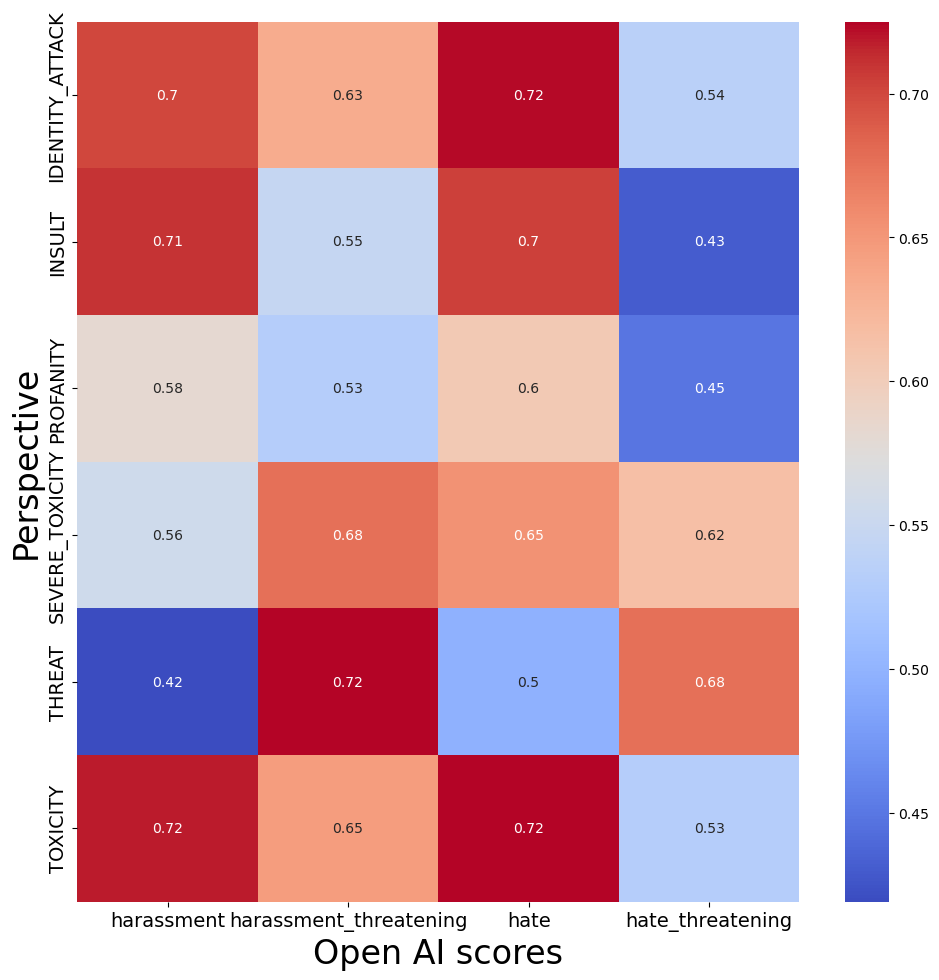

In [22]:
correlation_heatmap(df_corr)